In [2]:
from PIL import Image
import numpy as np
from scipy import signal as sg 

In [4]:
im = Image.open("tiger_1.jpg")

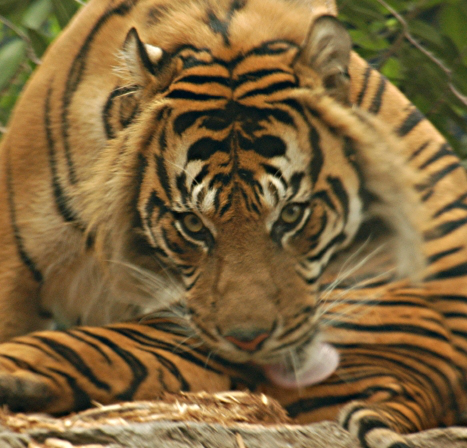

In [5]:
im

In [8]:
im.format

'JPEG'

In [9]:
im.mode

'RGB'

In [10]:
im.size

(467, 448)

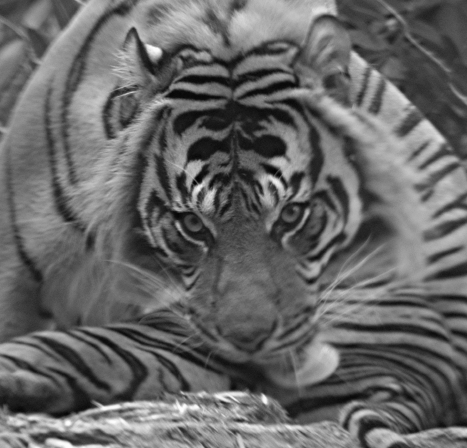

In [11]:
im.convert('L') # convert to grayscale

In [15]:
new_im = im.resize((256,256))

In [17]:
new_im.save('tiger_1-256x256','png')

In [33]:
im = Image.open('tiger_1-256x256')

In [69]:
source = im.resize((100,100)).split()

In [255]:
np.array(source[0]).shape

(100L, 100L)

In [315]:
r_array = np.stack((np.array(source[0],dtype='float'),
                    np.array(source[1],dtype='float'),
                    np.array(source[1],dtype='float')))

In [316]:
np.array(source[0])
r_array.shape

(3L, 100L, 100L)

Convolution(https://en.wikipedia.org/wiki/Kernel_(image_processing))


In [337]:
conv_array = np.array([[[0.,0.,0.],[0.,1.,0.],[0.,0.,0.]],
                       [[0.,0.,0.],[0.,1.,0.],[0.,0.,0.]],
                       [[0.,0.,-0.],[0.,1.,0.],[0.,0.,0.]]])
conv_array.shape

(3L, 3L, 3L)

In [352]:
#r_array_conv = np.stack((
#                         np.array(sg.convolve(r_array[0],conv_array[0]).clip(0,255),dtype=np.uint8),
#                        np.array(sg.convolve(r_array[1],conv_array[1]).clip(0,255),dtype=np.uint8),
#                         np.array(sg.convolve(r_array[2],conv_array[2]).clip(0,255),dtype=np.uint8)
#                        ),axis=2)
r_array_conv =np.array(sg.convolve(r_array[0],conv_array[0]).clip(0,255),dtype=np.uint8)
r_array_conv.shape

(102L, 102L)

In [357]:
r_array_conv

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  82,  74, ...,  70,  65,   0],
       [  0,  62,  63, ...,  68,  63,   0],
       ..., 
       [  0, 186, 131, ..., 104,  91,   0],
       [  0, 191, 205, ..., 152, 141,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

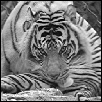

In [359]:
Image.fromarray(r_array_conv)

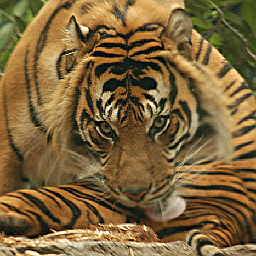

In [145]:
from PIL import ImageFilter
im.filter(filter=ImageFilter.SHARPEN)

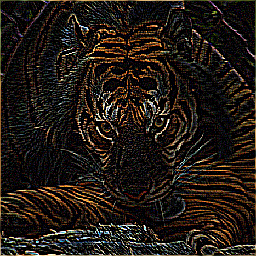

In [146]:
im.filter(filter=ImageFilter.FIND_EDGES)